In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk


In [5]:

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

# Load dataset
data_path = "spam.csv"
df = pd.read_csv(data_path, encoding='latin-1')

# Select necessary columns and rename them
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Convert labels to binary (ham = 0, spam = 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [6]:

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['cleaned_message'] = df['message'].apply(preprocess_text)

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_message'])
y = df['label']


In [7]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define ensemble models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss')  # Removed deprecated parameter
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": accuracy})

# Convert results into a DataFrame
results_df = pd.DataFrame(results)


<ipython-input-8-7c0423793b39>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='coolwarm')


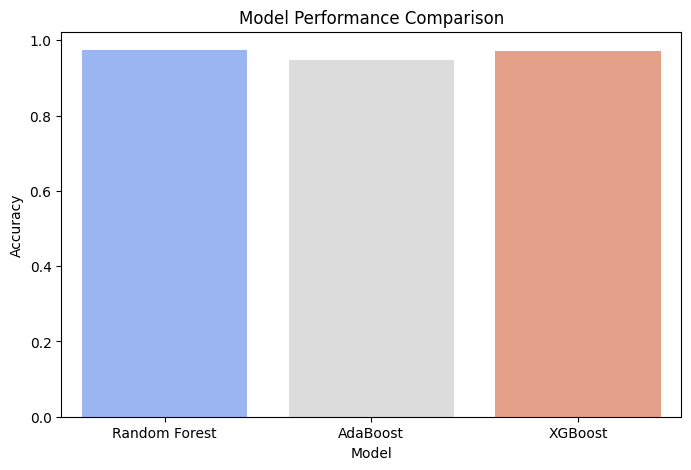

In [8]:

# Plot Model Performance Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='coolwarm')
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()


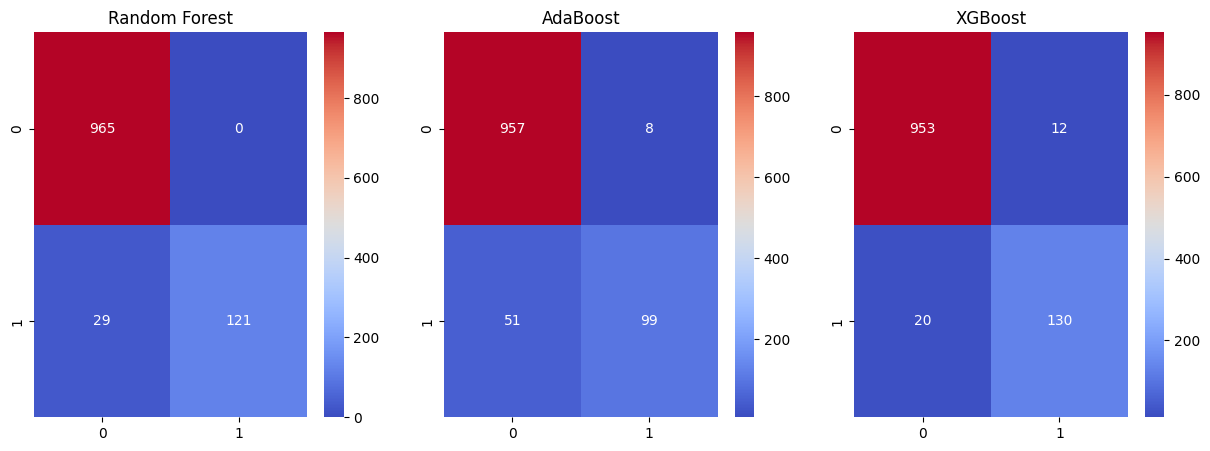

In [9]:

# Confusion Matrix Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm', ax=axes[i])
    axes[i].set_title(name)
plt.show()


<ipython-input-10-6383b52b6041>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'].map({0: 'Ham', 1: 'Spam'}), palette="coolwarm")


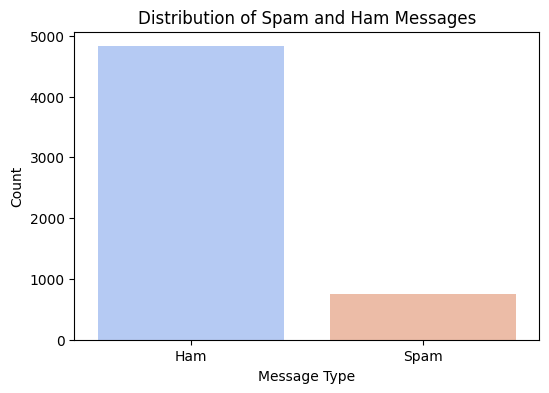

In [10]:

# Label Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['label'].map({0: 'Ham', 1: 'Spam'}), palette="coolwarm")
plt.title("Distribution of Spam and Ham Messages")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()

# Insights:
# XGBoost & Random Forest perform well; AdaBoost may need tuning.
# The confusion matrix shows false positives and false negatives, helping to analyze misclassifications.
# More text cleaning & feature engineering can improve accuracy.

